# EDA

In [9]:
%reload_ext autoreload
%autoreload 2

# check if working in colab
try:
    # In colab
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/MyDrive/projects/paris-traffic-forecast
    %pip install -q darts

except:
    # In local
    # replace with your path
    %cd /mnt/d/Google Drive/projects/paris-traffic-forecast




/mnt/d/Google Drive/projects/paris-traffic-forecast


In [73]:
# Import libraries
import matplotlib.pyplot as plt

## load data

In [48]:
import pandas as pd
path_to_data = 'data/AV-champs-elysees.csv'
time_col = "Date et heure de comptage"
value_cols = ['Débit horaire', "Taux d'occupation"]
df = pd.read_csv(path_to_data, sep=';').sort_values(time_col)
# set datetime index
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], utc=True).dt.tz_localize(None)
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
Date et heure de comptage,,,,,,,,,,,,,,
2020-11-01 03:00:00,4264,AV_Champs_Elysees,34.0,0.40111,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 04:00:00,4264,AV_Champs_Elysees,40.0,0.48389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 05:00:00,4264,AV_Champs_Elysees,66.0,0.75056,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 06:00:00,4264,AV_Champs_Elysees,108.0,0.99611,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 07:00:00,4264,AV_Champs_Elysees,126.0,1.09889,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 19:00:00,4264,AV_Champs_Elysees,1311.0,27.14111,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-11-30 20:00:00,4264,AV_Champs_Elysees,1195.0,23.34445,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-11-30 21:00:00,4264,AV_Champs_Elysees,1154.0,17.12945,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


In [78]:
df.iloc[0]

Identifiant arc                                                         4264
Libelle                                                    AV_Champs_Elysees
Débit horaire                                                           34.0
Taux d'occupation                                                    0.40111
Etat trafic                                                           Fluide
Identifiant noeud amont                                                 2294
Libelle noeud amont                             Av_Champs_Elysees-Washington
Identifiant noeud aval                                                  2293
Libelle noeud aval                                   Av_Champs_Elysees-Berri
Etat arc                                                            Invalide
Date debut dispo data                                             2005-01-01
Date fin dispo data                                               2019-06-01
geo_point_2d                                     48.8715358799,2.30172279246

In [80]:
df.iloc[-1]

Identifiant arc                                                         4264
Libelle                                                    AV_Champs_Elysees
Débit horaire                                                          965.0
Taux d'occupation                                                   13.15167
Etat trafic                                                           Fluide
Identifiant noeud amont                                                 2294
Libelle noeud amont                             Av_Champs_Elysees-Washington
Identifiant noeud aval                                                  2293
Libelle noeud aval                                   Av_Champs_Elysees-Berri
Etat arc                                                            Invalide
Date debut dispo data                                             2005-01-01
Date fin dispo data                                               2019-06-01
geo_point_2d                                     48.8715358799,2.30172279246

In [74]:
df.describe()

,Identifiant arc,Débit horaire,Taux d'occupation,Identifiant noeud amont,Identifiant noeud aval
count,9233.0,9185.000000,9179.000000,9233.0,9233.0
mean,4264.0,728.262058,14.024305,2294.0,2293.0
std,0.0,427.744884,12.733968,0.0,0.0
min,4264.0,1.000000,0.000000,2294.0,2293.0
25%,4264.0,289.000000,3.308610,2294.0,2293.0
50%,4264.0,833.000000,11.419450,2294.0,2293.0
75%,4264.0,1113.000000,20.741390,2294.0,2293.0
max,4264.0,1703.000000,96.136110,2294.0,2293.0


In [49]:
from darts import TimeSeries

# transform data to TimeSeries
ts = TimeSeries.from_dataframe(df, 
                          value_cols=["Débit horaire", "Taux d'occupation"],
                          fill_missing_dates=True,
                          freq='H')
ts

<TimeSeries (DataArray) (Date et heure de comptage: 9477, component: 2, sample: 1)>
array([[[3.400000e+01],
        [4.011100e-01]],

       [[4.000000e+01],
        [4.838900e-01]],

       [[6.600000e+01],
        [7.505600e-01]],

       ...,

       [[1.154000e+03],
        [1.712945e+01]],

       [[1.049000e+03],
        [1.632389e+01]],

       [[9.650000e+02],
        [1.315167e+01]]])
Coordinates:
  * Date et heure de comptage  (Date et heure de comptage) datetime64[ns] 202...
  * component                  (component) object 'Débit horaire' "Taux d'occ...
Dimensions without coordinates: sample

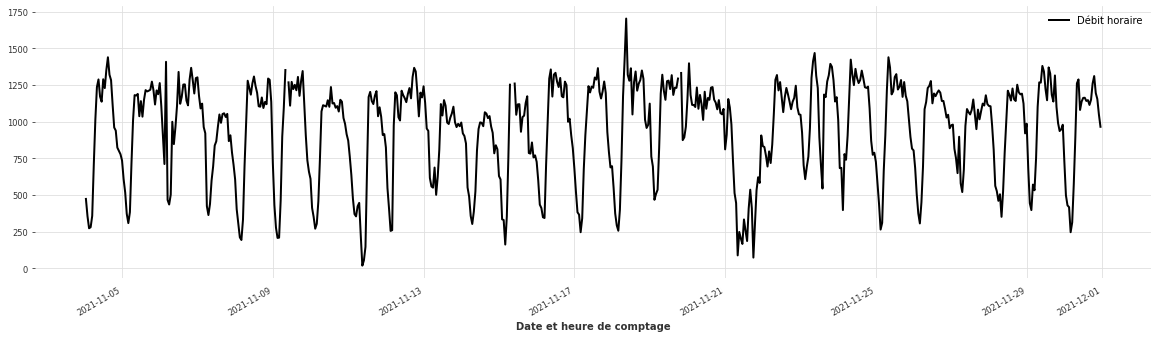

In [72]:
plt.rcParams['figure.figsize'] = [20, 5]
# plot component of index 0 after 2021-11-04 
ts.drop_before(pd.Timestamp("2021-11-04")).univariate_component(0).plot(label='Débit horaire')

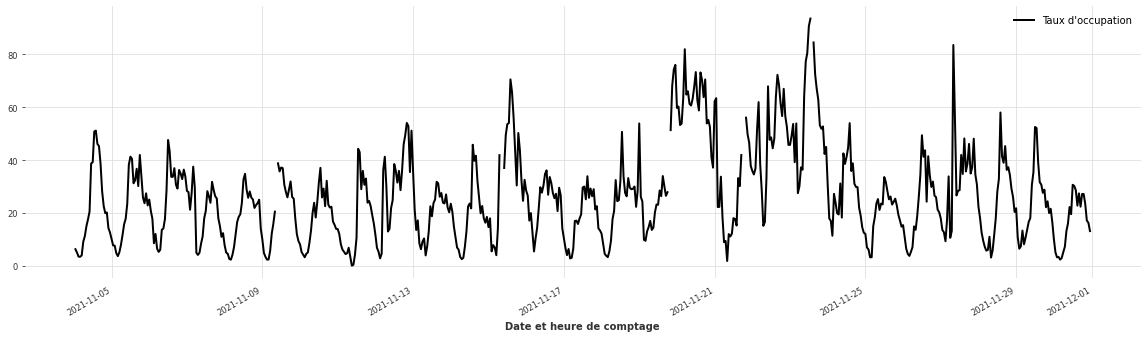

In [76]:
plt.rcParams['figure.figsize'] = [20, 5]
# plot component of index 1 after 2021-11-04 
ts.drop_before(pd.Timestamp("2021-11-04")).univariate_component(1).plot(label='Taux d\'occupation')